In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [26]:
data = {'Latitude': [44.97, 62.40, 46.75, 54.01, 51.15, -2.01, -2.34, -1.86], 
     'Longitude': [-103.77, -96.80, 2.40, -2.53, 10.40, 29.37, 30.12, 30.63]}
data = pd.DataFrame(data=data)
data

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-2.01,29.37
6,-2.34,30.12
7,-1.86,30.63


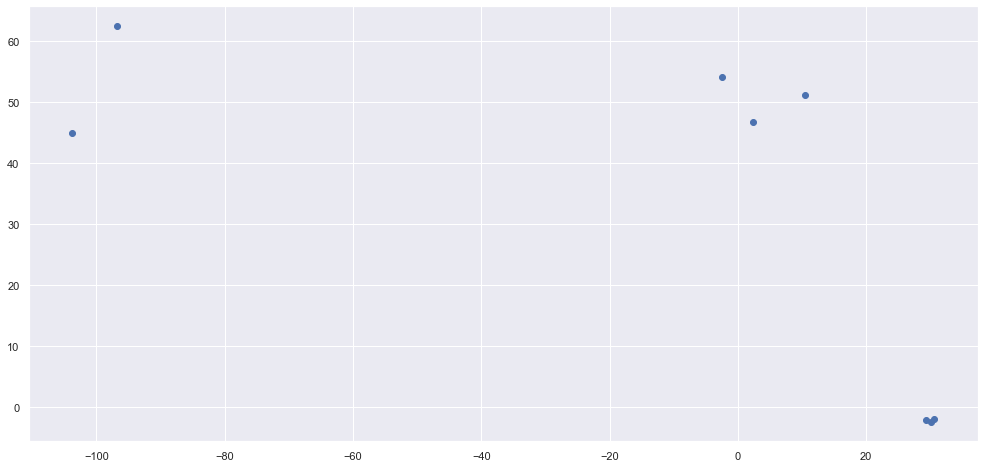

In [28]:
fig = plt.figure(1, figsize=(17, 8))
plt.scatter(data['Longitude'],data['Latitude'])
plt.show()

In [32]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [33]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([1, 1, 2, 2, 2, 0, 0, 0])

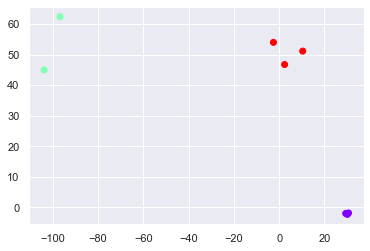

In [34]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

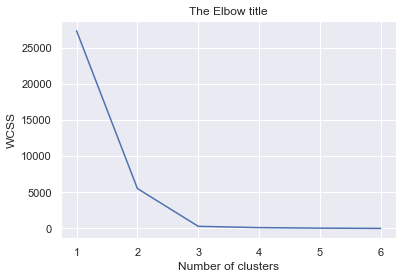

In [37]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Useful resources:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/